In [14]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import os

os.chdir('../data')

Data imported is BLS data for monthly total employment for the manufacturing industry from 2009m1 to 2019m3. Data for 2009 will be treated as an outlier as it is still showing effects from the fiancial crisis. This recession data will be removed to avoid it influecing any forecasted projections. Data will start in 2010m1.

In [15]:
mfg_emp = pd.read_excel('mfg/employment_tot.xlsx', skiprows=12, usecols=['Value'])

dateind = pd.date_range(start='01/01/2009', end='04/01/2019', freq='M')

mfg_emp.set_index([dateind], inplace=True)

mfg_emp2 = mfg_emp['01/01/2010':][:]

print('index set for range and 2009 removed')

index set for range and 2009 removed


Creating an index column and basing to 2010m1. This will standardize the data when comparing to other employment growth trends in other industries. Linear regression and an exponential growth model will both be applied to this data to forecast employment trends based on the current economic and technological environment. This is not an extremely complicated forecasting method that does not account for technology changes and the possiblity of exponential growth in the incorporation of automation.

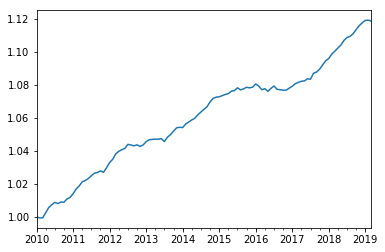

In [16]:
mfg_emp2['base index'] = mfg_emp2['Value']/mfg_emp2['Value'][0]
mfg_emp2['base index'].plot()

A simple regression equation will be created. This equation will then be used to forecast employment trends through 2040. This is understandably a long forecast for the amount of historical data.

In [28]:
X = []
for x in range(len(mfg_emp2.index)):
    temp = 1+x
    X.append(temp)

y = mfg_emp2.reset_index(drop=True)['base index']

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

# Print out the statistics
model.summary()
predictions

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111]

Creating a datetimeindex that spans the historical and prediction range. Will then use similar method of creating a range in place of the dates to be used as the independent value for the regression. Will then subset this to start where the historical period ends for running the regression during the projection time span.

In [24]:
projdates = pd.date_range(start='01/01/2010', end='01/01/2041', freq='m')
proj_X1 = []

for x in range(len(projdates)):
    temp = 1+x
    proj_X1.append(temp)
    
proj_X2 = proj_X1[len(X):]
# should result in 0 to ensure index is spanning the entire range.
len(proj_X2)+len(X)-len(proj_X1)

0

Concatenating the regression line for the entire span 2010 to 2040. This will provide the projection through 2040 but will need to be converted back from the index to get the actual employment value. Additionally the MAPE should be calculated for the historical period. Compare the MAPE to the exponential growth method to be done next and determine the most appropriate method.

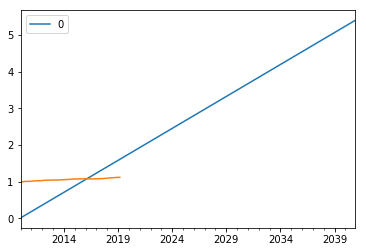

In [25]:
projections = model.predict(proj_X2)
projection = pd.DataFrame(projections)
prediction = pd.DataFrame(predictions)
regression = pd.concat([prediction, projection], axis=0)
regression.set_index([projdates], inplace=True)
regression.plot()
mfg_emp2['base index'].plot()

User defined function is create to calculate the MAPE. Plug in the 'predictions' array and the 'y' array created within the multiple steps above.

In [20]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [21]:
mfg_lm_mape = mean_absolute_percentage_error(y, predictions)
mfg_lm_mape

40.1245574487448

Notes:

Something is wrong with the regression. Even the historical period is out of wack as can be seen on the graph.